In [89]:
import itertools as it
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import copy
from collections import defaultdict, Counter

In [90]:
def T_pqr(p,q,r):
    G = nx.Graph()
    if p> 1 and q>1 and r >1:
        for i in range(p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p-1):
            G.add_edge(i,i+1)
        for i in range (p,p+q-2):
            G.add_edge(i,i+1)
            G.add_edge(0,p)
        for i in range(p+q-1,p+q+r-3):
            G.add_edge(i,i+1)
            G.add_edge(0,p+q-1)
    if p == 1 or q ==1 or r == 1:
        for i in range(p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p+q+r-3):
            G.add_edge(i,i+1)
    if p == 2:
        for i in range(0,p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, 1):
            G.add_edge(i,i+1)
        for i in range (2,q):
            G.add_edge(i,i+1)
            G.add_edge(0,2)
        for i in range(q+1,q+r-1):
            G.add_edge(i,i+1)
            G.add_edge(0,q+1)
    if q ==2 :
        for i in range(0,p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p-1):
            G.add_edge(i,i+1)
            G.add_edge(0,p)
        for i in range(p+2,p+q+r-3):
            G.add_edge(i,i+1)
            G.add_edge(0,p+2)
    if r == 2:
        for i in range(0,p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p-1):
            G.add_edge(i,i+1)
        for i in range (p,p+q-2):
            G.add_edge(i,i+1)
            G.add_edge(0,p)
        G.add_edge(0,p+q-1)
    return G

In [91]:
def symetryczna(A, k):
    
    max_len = max(len(sublist) for sublist in A)
    zewn = []
    
    for kombinacja in it.combinations_with_replacement(range(len(A)), k):
        summed_sublist = []
        for j in range(max_len):
            sublist_sum = sum(A[i][j] if j < len(A[i]) else 0 for i in kombinacja)
            summed_sublist.append(sublist_sum)
        zewn.append(summed_sublist)
    return zewn

In [92]:
def symetryczna(A, k):
    
    max_len = max(len(sublist) for sublist in A)
    zewn = []
    
    for kombinacja in it.combinations_with_replacement(range(len(A)), k):
        summed_sublist = []
        for j in range(max_len):
            sublist_sum = sum(A[i][j] if j < len(A[i]) else 0 for i in kombinacja)
            summed_sublist.append(sublist_sum)
        zewn.append(summed_sublist)
    return zewn

In [93]:
def zewnetrzna(A, k):
    
    max_len = max(len(sublist) for sublist in A)
    zewn = []
    
    for kombinacja in it.combinations(range(len(A)), k):
        summed_sublist = []
        for j in range(max_len):
            sublist_sum = sum(A[i][j] if j < len(A[i]) else 0 for i in kombinacja)
            summed_sublist.append(sublist_sum)
        zewn.append(summed_sublist)
    return zewn

In [94]:
#liczy zewenętrznąale numeruje poszczególne linijki outputu. Dla testów
# czy liczy odpowiednio
def zewnetrzna_num(A, k):
    
    max_len = max(len(sublist) for sublist in A)
    zewn = []
    
    for kombinacja in it.combinations(range(len(A)), k):
        summed_sublist = []
        for j in range(max_len):
            sublist_sum = sum(A[i][j] if j < len(A[i]) else 0 for i in kombinacja)
            summed_sublist.append(sublist_sum)
        zewn.append(summed_sublist)
    for idx, wynik in enumerate(zewn, 1):
        print(f"{idx} : {wynik}")

In [95]:
D3= T_pqr(2,2,1)
D5= T_pqr(3,2,2)

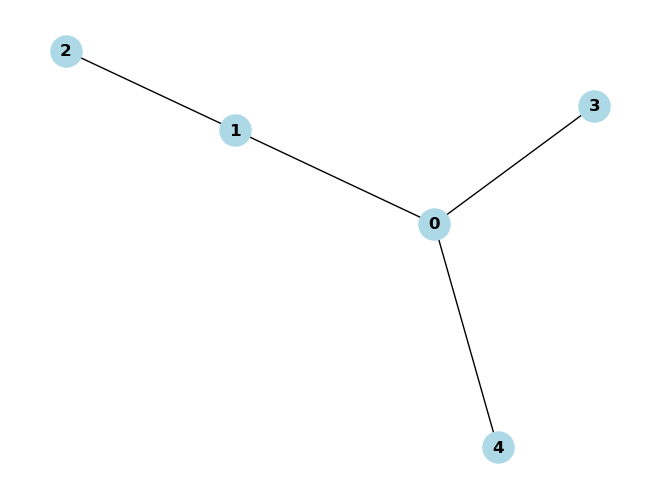

In [100]:
nx.draw(D5, with_labels=True, node_size=500, node_color='lightblue', font_weight='bold')
plt.show()

In [30]:
waga = [[0,0,0,0,1],[1,0,0,0,-1],[-1,1,0,1,0],[0,1,0,-1,0],
            [0,-1,1,1,0],[1,-1,1,-1,0],[0,0,-1,1,0],
            [-1,0,1,0,1],[1,0,-1,-1,0],[0,0,0,-1,0],[-1,0,0,1,0],[1,-1,0,0,-1],
           [0,-1,0,0,1],[0,1,-1,0,-1],[0,0,1,0,-1], [-1,1,-1,0,1]]
wagas = tuple(symetryczna(waga,2))

wagaaa = list(zewnetrzna(waga, 2))
wagaz = zewnetrzna(waga,2)

### redefiniowanie znanych funkcji, aby operowały na krotkach wag a nie na listach wag

In [31]:
def nadawanie_wag(G, wagi_lista):
    wagi = []
    for idx, (node, weight) in enumerate(zip(G.nodes, wagi_lista)):
        G.nodes[node]['weight'] = weight
    for _, w in G.nodes(data='weight'):
        wagi.append(w)
    return wagi

In [32]:
def odbicie(G, node, wagi):
    #jeśli chcesz sprawdzić, czy odbicie działa oraz chcesz mieć wypisane wagi, komenda poniżej to umożliwia:
    #print(nadawanie_wag(G, wagi_lista))
    
    wagi = [] 

    neighbors = list(G.neighbors(node))

    nowa_waga1 = - G.nodes[node]['weight']
    G.nodes[node]['weight'] = nowa_waga1

    for neighbor in neighbors:
        nowa_waga = G.nodes[neighbor]['weight'] -  G.nodes[node]['weight']
        G.nodes[neighbor]['weight'] = nowa_waga
    for _, w in G.nodes(data='weight'):
        wagi.append(w)
    return wagi

In [33]:
def ro_1(G, wagi):    
    wagi = []
    for node in G.nodes():
        G.nodes[node]['weight'] += 1
        wagi.append( G.nodes[node]['weight'])
    return wagi

In [34]:
def ro_2(G, wagi):    
    wagi = []
    for node in G.nodes():
        G.nodes[node]['weight'] -= 1
        wagi.append( G.nodes[node]['weight'])
    return wagi

# rownolegle_mod

In [55]:
#podział na plusy i minusy

### aby zwiększyć limit na councie popraw liczbę w linijce:
### while not pozytywne(wagi_kopia) and count < 10000000: (13 linijka, nie licząc pustych)

def rownolegle_mod(G, lista_wag):
    def pozytywne(wagi):
        return all(weight >= 0 for weight in wagi)

    wyniki_dla_wszystkich_list = []

    for wagi in lista_wag:
        wagi_kopia = wagi.copy()
        nadawanie_wag(G, wagi_kopia)

        count = 0
        if pozytywne(wagi_kopia):
            wyniki_dla_wszystkich_list.append((tuple(wagi_kopia), count))
            continue

        poczatkowy_stan = tuple(wagi_kopia)

        while not pozytywne(wagi_kopia) and count < 10000:
            sorted_nodes = sorted(G.nodes(data=True), key=lambda x: x[1]["weight"],
                reverse=True)
            nodes_ujemne = [node for node, data in sorted_nodes
                if isinstance(data.get('weight'), (int, float)) and data['weight'] < 0]

            for node in nodes_ujemne:
                wynik = ro_1(G, wagi_kopia)
                wynik2 = odbicie(G, node, wynik)
                wynik3 = ro_2(G, wynik2)

                wagi_kopia = wynik3.copy()
                count += 1

                if pozytywne(wagi_kopia):
                    wyniki_dla_wszystkich_list.append((tuple(wagi_kopia), count))
                    break

                if tuple(wagi_kopia) == poczatkowy_stan:
                    wyniki_dla_wszystkich_list.append(([], count))
                    break
            else:
                continue
            break

    wystapienia_wag = Counter(waga for waga, _ in wyniki_dla_wszystkich_list if waga)

    waga_do_count = defaultdict(lambda: {'nieparzyste': 0, 'parzyste': 0})
    
    for waga, count in wyniki_dla_wszystkich_list:
        if waga:
            if wystapienia_wag[waga] == 1 and count == 0:
                waga_do_count[waga]['parzyste'] = 1
                waga_do_count[waga]['nieparzyste'] = '0'

            else:
                if count % 2 == 0:
                    waga_do_count[waga]['parzyste'] += 1
                else:
                    waga_do_count[waga]['nieparzyste'] += 1

    wynik = [
        {'suma_count_nieparzyste': counts['nieparzyste'], 'suma_count_parzyste':counts['parzyste'], 'waga': list(waga)}
        for waga, counts in waga_do_count.items()
    ]

    return wynik


In [56]:
rownolegle_mod(D5, ([2,0,0,0,-2],[2,0,0,0,-2]))


[{'suma_count_nieparzyste': 2,
  'suma_count_parzyste': 0,
  'waga': [1, 0, 0, 0, 0]}]

In [57]:
#waga
rownolegle_mod(D5, waga)

[{'suma_count_nieparzyste': '0',
  'suma_count_parzyste': 1,
  'waga': [0, 0, 0, 0, 1]}]

In [58]:
#symetryczna
rownolegle_mod(D5, wagas)

[{'suma_count_nieparzyste': '0',
  'suma_count_parzyste': 1,
  'waga': [0, 0, 0, 0, 2]},
 {'suma_count_nieparzyste': 1,
  'suma_count_parzyste': 1,
  'waga': [1, 0, 0, 0, 0]},
 {'suma_count_nieparzyste': 4,
  'suma_count_parzyste': 5,
  'waga': [0, 0, 1, 0, 0]}]

In [ ]:
#zewnetrzna
rownolegle_mod(D5, wagaz)

[{'suma_count_nieparzyste': '0',
  'suma_count_parzyste': 1,
  'waga': [1, 0, 0, 0, 0]},
 {'suma_count_nieparzyste': 4,
  'suma_count_parzyste': 4,
  'waga': [0, 0, 1, 0, 0]}]

# rownolegle

In [85]:
#podział na plusy i minusy

### aby zwiększyć limit na councie popraw liczbę w linijce:
### while not pozytywne(wagi_kopia) and count < 10000000: (13 linijka, nie licząc pustych)

### ta procedura redukuje wagi, które mają tyle samo plusów co minusów
def rownolegle(G, lista_wag):
    def pozytywne(wagi):
        return all(weight >= 0 for weight in wagi)

    wyniki_dla_wszystkich_list = []

    for wagi in lista_wag:
        wagi_kopia = wagi.copy()
        nadawanie_wag(G, wagi_kopia)

        count = 0
        if pozytywne(wagi_kopia):
            wyniki_dla_wszystkich_list.append((tuple(wagi_kopia), count))
            continue

        poczatkowy_stan = tuple(wagi_kopia)

        while not pozytywne(wagi_kopia) and count < 10000:
            sorted_nodes = sorted(G.nodes(data=True), key=lambda x: x[1]["weight"],
                reverse=True)
            nodes_ujemne = [node for node, data in sorted_nodes
                if isinstance(data.get('weight'), (int, float)) and data['weight'] < 0]

            for node in nodes_ujemne:
                wynik = ro_1(G, wagi_kopia)
                wynik2 = odbicie(G, node, wynik)
                wynik3 = ro_2(G, wynik2)

                wagi_kopia = wynik3.copy()
                count += 1

                if pozytywne(wagi_kopia):
                    wyniki_dla_wszystkich_list.append((tuple(wagi_kopia), count))
                    break

                if tuple(wagi_kopia) == poczatkowy_stan:
                    wyniki_dla_wszystkich_list.append(([], count))
                    break
            else:
                continue
            break

    wystapienia_wag = Counter(waga for waga, _ in wyniki_dla_wszystkich_list if waga)

    waga_do_count = defaultdict(lambda: {'nieparzyste': 0, 'parzyste': 0})
    
    for waga, count in wyniki_dla_wszystkich_list:
        if waga:
            if wystapienia_wag.get(waga, 0) == 1 and count == 0:
                waga_do_count[waga]['parzyste'] = 1
                waga_do_count[waga]['nieparzyste'] = 0
            else:
                if count % 2 == 0:
                    waga_do_count[waga]['parzyste'] += 1
                else:
                    waga_do_count[waga]['nieparzyste'] += 1
    wynik = [
        {'suma_count_nieparzyste': counts['nieparzyste'], 
         'suma_count_parzyste': counts['parzyste'], 
         'waga': waga}
        for waga, counts in waga_do_count.items()
        if counts['parzyste'] != counts['nieparzyste']
    ]
    return wynik

In [86]:
rownolegle(D5, waga)

[{'suma_count_nieparzyste': 0,
  'suma_count_parzyste': 1,
  'waga': (0, 0, 0, 0, 1)}]

In [87]:
rownolegle(D5, wagas)

[{'suma_count_nieparzyste': 0,
  'suma_count_parzyste': 1,
  'waga': (0, 0, 0, 0, 2)},
 {'suma_count_nieparzyste': 4,
  'suma_count_parzyste': 5,
  'waga': (0, 0, 1, 0, 0)}]

In [88]:
rownolegle(D5, wagaz)

[{'suma_count_nieparzyste': 0,
  'suma_count_parzyste': 1,
  'waga': (1, 0, 0, 0, 0)}]